# *SENTIMENT ANALYSIS*

*sentiment analysis is going analysis how happy or sad someone else with his opinions or feelings about the topic.....
Features of dataset: comment: the text*
                     *sentiment:sentiment respect to  comment data 1 for positive comment and 0 for negetive comment* 

*given the tweet  we need to predict the emotion of the tweet*

In [1]:
import numpy as np                      # for mathematical calculation
import pandas as pd                     #for handeling datasets
import nltk                             # use for natural language processing 
from nltk.corpus import stopwords       #for identify the stopwords
from sklearn.feature_extraction.text import TfidfVectorizer #convert a collection of raw documents to a matrix of TD-IdF features
from sklearn.model_selection import train_test_split        #for spliting arrays or metrics into random train and test subsets
from sklearn import metrics             #for checking the model accuracy

*datasets for commenting part*

In [2]:
comm = ["then I turn on the light and the radio and enjoy my Da Vinci Code.",
    "then I turn on the light and the radio and enjoy my Da Vinci Code.i love da vinci code...",
     "i love da vinci code...",
     "i love da vinci code...",
     "TO NIGHT:: THE DA VINCI CODE AND A BEAUTIFUL MIND...",
     "THE DA VINCI CODE is AN AWESOME BOOK....",
     "Thing is, I enjoyed The Da Vinci Code",
     "very da vinci code slash amazing race.",
     "Hey I loved The Da Vinci Code!..",
     "also loved the da vinci code..",
     "I really enjoyed the Da Vinci Code but thought I would be disappointed in the other books & # 8230;",
     "I do like Angels and Demons more then The Da Vinci Code.",
     "The Da Vinci Code was a really good movie",
     "yeah, da vinci code is an awesome movie i liked it pretty interesting.",
     "I really like The Da Vinci Code.",
     "Da Vinci Code is amazing.",
     "The Da Vinci Code was awesome...",
     "The Da Vinci Code's backtory on various religious historical figures and such were interesting at times, but I'm more of scifi girl at heart.",
     "Book ( s ): I love The Da Vinci Code..",
     "And then we went to see The Da Vinci Code, which was CRAZY awesome and Ian McKellen is my old, gay husband.",
     "I love the da vinci code...",
     "Well I did enjoy Bridget Jones and I loved the Da Vinci Code so this idea appeals to me and it takes Chick Lit into one of the few arenas that the genre has yet to explore...",
     "I just read Da Vinci Code ( which was AWESOME by the way )  .",
     "I just read Da Vinci Code ( which was AWESOME by the way )  .",
     "I loved the Da Vinci Code!",
     "I love reading The Da Vinci Code!!!!",
     "I'm telling you, the Da Vinci Code is an AWESOME book!",
     "Then again, my opinion may be a bit biased because I loved the Da Vinci Code soundtrack. ).",
     "And I was quite pleased with my own open-mindedness, after having loved The Da Vinci Code so much, that I was able to get equal enjoyment seeing how the other side reads.",
     "I love the Da Vinci Code.",
     "Da Vinci code is awesome!",
     "The Da Vinci Code is awesome.",
     "The Da Vinci Code is SUCH an awesome book!",
     "I LOVE THE DA VINCI CODE...",
     "I loved The Da Vinci Code.",
     "oh so beautiful Da Vinci Code...",
     "i loved the da vinci code.",
     "The Da Vinci Code is an awesome book.",
     "Da vinci code is an awesome book.",
     "I miss ripping acoustic music and the Da Vinci Code...",
     "Personally, I neither hate nor love the Da Vinci Code.",
     "looks amazingly fun and possibly a bit cold... [ don't tell anyone ] but da vinci code is an awesome book.",
     "Da Vinci Code is of course a awesome book, but you will figure that out on page 286.",
     "I love The Da Vinci Code!",
     "i LOVED the Da Vinci Code.",
     "But seriously, the Da Vinci Code is an awesome book.",
     "da vinci code is awesome.",
     "I love The Da Vinci Code.",
     "The Da Vinci Code was fucking awesome!..",
     "The Da Vinci Code was awesome.",
     "Da Vinci Code was awesome, and sounds more probable to me than half the crap Fr.",
     "I loved the Da Vinci Code and the like.",
     "Da Vinci Code-that was awesome!..",
     "I loved the Da Vinci code, but it raises a lot of theological questions most of which are very absurd...",
     "The Da Vinci Code is an awesome book.",
     "Yeah the Da Vinci code is awesome....",
     " The Da Vinci Code is awesome though.",
     "i LOVE the da vinci code!",
     "The Da Vinci Code is an awesome book!!!",
     "Aarons mom and Aaron knew how much I loved the Da Vinci Code, so we took the tour inside.",
       "da vinci code is awesome!",
       "I loved the da vinci code...",
       "the Da Vinci Code is awesome..",
       "I'd love to go see Da Vinci Code but probably not next week.",
       "The Da Vinci Code was awesome.",
       "im sick of books right now, but i must say, da vinci code was awesome..",
       "finished reading the da vinci code, which is an awesome book.",
       "that and the da vinci code is awesome so far.",
       "I LOVE THE DA VINCI CODE!!!!... < < < < < 3333...",
       "And Da Vinci Code is awesome.",
       "The Da Vinci Code is awesome...",
       "Oh oh oh and I loved The Da Vinci Code!",
       "I love the Da Vinci code...",
       "The Da Vinci Code is awesome.",
       "and I love Da Vinci Code-illustrated edition is the only way to go!:)..",
       "I loved the Da Vinci code, and I can't wait for the movie.",
       "i loved da vinci code recently......",
       "Love the Da Vinci Code!(",
       "to their right ALSO read and LOVED the Da Vinci code.",
       "I * LOVED * Da Vinci code.I * LOVED * Da Vinci code.",
       "and i love reading da vinci code.....",
       "and i love Da Vinci Code too..",
       "and i love Da Vinci Code too..",
       "Da Vinci Code looks SO awesome...",
       "I finished The Da Vinci Code that was an awesome book!",
       "The Da Vinci Code was pretty awesome, but I liked Angels and Demons...",
       "I loved reading Da Vinci Code, can't wait for the movie to come out!..",
       "I love the Da Vinci Code.",
       "The Da Vinci Code really is an awesome book and you should all go get it.",
       " totally love the Da Vinci Code and i CA N'T wait until the movie!",
       "Personally I loved The Da Vinci Code, its a great thriller.",
       "I love the Da Vinci Code.....",
       "and the da vinci code is an awesome book!",
       "da vinci code is an awesome book..",
       "The Da Vinci Code is AWESOME!."
       "I loved the da vinci code.",
       "I loved the da Vinci Code-very interesting to think about things from a different angle.",
       "Da Vinci Code is a friggin awesome book.",
       "And the Da Vinci code is AMAZING, 30 pages left to go.",
       "outta all three i just loved the da vinci code.",
       "oh I love the book The Da VInci Code!"
       "da vinci code was a terrible movie.",
       "Then again, the Da Vinci code is super shitty movie, and it made like 700 million.",
       "The Da Vinci Code comes out tomorrow, which sucks.",
       "i thought the da vinci code movie was really boring.",
       "God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now.",
       "Da Vinci Code does suck.",
       "And better...-We all know Da Vinci code is bogus and inaccurate.",
       "Last time, Da Vinci code is also a bit disappointing to me, because many things written in the book is never mentioned in movie.",
       "And better...-We all know Da Vinci code is bogus and inaccurate.",
       "And better..-We all know Da Vinci code is bogus and inaccurate.",
       "And better..-We all know Da Vinci code is bogus and inaccurate.",
       "If Jesus is fabricated a la the Da Vinci Code then Christianity is worthless...",
       "I think this bolsters my arguments that both England and the Da Vinci Code sucks...",
       "And better..-We all know Da Vinci code is bogus and inaccurate.",
       "I really hate The Da Vinci Code.",
       "The more you say The Da Vinci Code is evil, the more people will read it.",
       "da vinci code sucked too long and too slow.....",
       "Da Vinci Code sucked, as expected.",
       "not sure if i already threw this at you but I hate the Da Vinci Code.",
       "This is why I hate the Da Vinci Code: because it takes nothing but a fucking pop culture phenomenon to get people to question things.",
       "Da Vinci Code really did suck and congrats on beating Jay it must of been like that time at Rickards when we beat them in the finals",
       "The Da Vinci Code sucks.",
       "and also, The Da Vinci Code is poorly written and boring..",
       "I hated The Da Vinci Code.",
       "I hate the Da Vinci Code, but I may see the movie for Audrey Tautou...I know Da Vinci Code is going to suckI know Da Vinci Code is going to suck.",
       "I know Da Vinci Code is going to suck.",
       "The Da Vinci Code sucks..",
       "I also think The Da Vinci Code sucked balls and it's the worst piece of shit I've ever read.",
       "RACHEL you could of told me your nans a libarian before i said i hated'The da vinci code '!!",
       "The Da Vinci code sucks and is also a page turner...",
       "then was the da vinci code, which sucked really bad.",
       "but whatever it is,. i really hate the da vinci code..",
       "I hated The Da Vinci Code.",
       "I hated The Da Vinci Code.",
       "the da vinci code sucks btw..",
       "I hate the Da Vinci Code..",
       "i fucking hated the da vinci code.",
       "Had an interesting conversation with one of the professors I work for about how Da Vinci Code sucks...",
       "ERM da vinci code and it sucked...",
       "I overslept though so jenn and i didn't get to see the da vinci code which sucked and now i have no money so yeah maybe later.",
       "DA VINCI CODE-SUCKED BALLZ.",
       "Da Vinci Code SUCKED ASS!!!",
       "how much the da vinci code sucks...",
       "Went to see The Da Vinci Code, which sucked even worse than the book...",
       "Da Vinci Code apparently sucks even more ass on film.",
       "who else thought the da vinci code kinda sucked...",
       "I think i started to hate Da Vinci Code just because it has gathered the lamest people in cinema.",
       "the da vinci code sucked.",
       "oh, and i hated  the novel....",
       "Da Vinci Code sucked.",
       "in other news, the da vinci code sucks a lama's balls.....",
       "Still haven't seen the Da Vinci Code, which kinda sucks..",
       "The Da Vinci Code sucked.",
       "BECAUSE DA VINCI CODE SUCKED!!",
       "3 Though I heard Da Vinci Code sucked.",
       "I officially hate the Da Vinci Code, the end.",
       "ya da vinci code really sucked....",
       "I heard The da Vinci Code sucked.",
       "We saw Da Vinci Code, which sucked.",
       "we saw the da vinci code, which kinda sucked in an okay way.",
       "the da vinci code sucked!",
       "I hated Da Vinci Code..",
       "The Da Vinci Code sucks, BTW!",
       "I hate the Da Vinci Code.",
       "I did not get to see Da Vinci Code which sucked a little bit, but hopefully that may happen during the coming week sometime..",
       "They were holding signs saying I love Jesus Christ, but I hate the Da Vinci Code.",
       "Because of this project, I fucking hate the Da Vinci Code.",
       "THE DA VINCI CODE SUCKS.",
       "i hated the da vinci code, the movie witha passion",
       "The Da Vinci Code sucked.",
       "the Da Vinci Code sucks.",
       "I hated The Da Vinci Code...",
       "Da Vinci Code sucks",
       "did i mention the da vinci code sucked big donkey balls?..",
       "the da vinci code sucked big donkey balls...",
       "The Da Vinci Code [ movie ] sucked!..",
       "to see the da vinci code, which totally sucked balls.",
       "The Da Vinci Code's supposed to suck..",
       "da vinci code sucks.",
       "I'll let y'all know if The Da Vinci Code sucks or not...",
       "Critics are saying that The Da Vinci Code, due in theaters this weekend, stinks.",
       "Now, I am the first person to say that The Da Vinci Code sucks, but hello, it ’ s a novel!",
       "I really hate the Da Vinci Code..",
       "I really hate the Da Vinci Code...",
       "It's been on a couple of times already, but cos I think the da Vinci Code sucks I never took the effort of watching it.(",
       "The Da vinci Code is so SUCK!!!!!!!",
       "The Da Vinci Code sucked big time.",
       "mang i could of told you the da vinci code suck!",
       " Man i hated the Da Vinci Code.",
       "After school, I went with Latin Club to see the Da Vinci code, which sucked...",
       "the da vinci code sucks majorly....",
       "da vinci code = sucks major ass...",
       "I hate The Da Vinci Code.",
       "Da Vinci Code kinda sucks second time around..",
       "Da Vinci Code sucked, but talking through it definately didnt suck.",
       "and da vinci code sucks!..",
       "i heard that the da vinci code sucks especially compared to the book.",
       "The Da Vinci Code sucks.",
       "anyhow, the da vinci code sucks lah.",
       "The Da Vinci Code sucked.",
       "Rofls, but yeah I hated the Da Vinci Code.",
       "I heard Da Vinci Code sucked pretty hard, which is too bad, because I like Ron Howard.",
       "i use google for my music urls and the da vinci code sucked!",
       "da vinci code the movie sucked.",
       "im kinda sad that da vinci code sucked(",
       "Does The Da Vinci Code suck?...",
       "There will be a lot of fun songs, one will be a sing along about how much the Da Vinci Code SUCKS(",
       "I've seen X-Men three times and the Da Vinci Code royally sucked...",
       "da vinci code sucks ass.",
       "The Da Vinci Code sucked like a Hoover.",
       "And by the way, Da Vinci Code movie sucks ass..",
       "da vinci code sucked da vinci code sucks da vinci code sucks!.",
       "da vinci code will suck!",
       "da vinci code sucked, IMO.",
       "I wasn't even in the mood to shop yesterday and also Da Vinci Code sucked ASS.",
       "Da Vinci Code sucked but the story and ideas were very interesting...",
       "Also, Da Vinci Code is SUCK!!!!!!!!",
       "Well, I'm not gonna lie, The Da Vinci Code SUCKED!",
       "DA VINCI CODE SUCKS ASS.",
       "Da Vinci code sucks ass as a movie.",
       "The Da Vinci Code sucked ass!!!!",
       "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Brokeback Mountain was an AWESOME movie.",
     "Brokeback Mountain was so awesome.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "I love Brokeback Mountain....",
     "I love Brokeback Mountain.",
     "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Brokeback Mountain was an AWESOME movie.",
     "Brokeback Mountain was so awesome.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "I love Brokeback Mountain....",
     "I love Brokeback Mountain.",
     "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Brokeback Mountain was an AWESOME movie.",
     "Brokeback Mountain was so awesome.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "I love Brokeback Mountain....",
     "I love Brokeback Mountain.",
     "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Brokeback Mountain was an AWESOME movie.",
     "Brokeback Mountain was so awesome.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "I love Brokeback Mountain....",
     "I love Brokeback Mountain.",
     "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Brokeback Mountain was an AWESOME movie.",
     "Brokeback Mountain was so awesome.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "I love Brokeback Mountain....",
     "I love Brokeback Mountain.",
     "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Brokeback Mountain was an AWESOME movie.",
     "Brokeback Mountain was so awesome.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "I love Brokeback Mountain....",
     "I love Brokeback Mountain.",
     "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Brokeback Mountain was an AWESOME movie.",
     "Brokeback Mountain was so awesome.",
     "Brokeback Mountain was so awesome.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "I love Brokeback Mountain....",
     "I love Brokeback Mountain.",
     "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Brokeback Mountain was an AWESOME movie.",
     "Brokeback Mountain was so awesome.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "I love Brokeback Mountain....",
     "I love Brokeback Mountain.",
     "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Brokeback Mountain was an AWESOME movie.",
     "Brokeback Mountain was so awesome.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "I love Brokeback Mountain....",
     "I love Brokeback Mountain.",
     "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Brokeback Mountain was an AWESOME movie.",
     "Brokeback Mountain was so awesome.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "I love Brokeback Mountain....",
     "I love Brokeback Mountain.",
     "Brokeback mountain was beautiful...",
     "Anyway, thats why I love Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "man i loved brokeback mountain!",
     "Anyway, thats why I love ' Brokeback Mountain.",
     "I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:",
     "dudeee i LOVED brokeback mountain!!!!",
     "Anyway, thats why I love 'Brokeback Mountain.",
     "He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..",
     "Brokeback Mountain is packed with beautiful sceneries and such.",
     "I love Brokeback Mountain and I'm so dissapointed and surprised that it did not win the best picture and best actor..",
     "I loved Brokeback Mountain, though I think you're right about its being acceptable in mainstream culture because it doesn't challenge that culture's heteronormativity.",
     "Don't get me wrong, I love brokeback mountain, but I think it has more to do that only white people can talk about racism and wins an oscar.",
     "Brokeback Mountain is beautiful(",
     "Brokeback Mountain is bound to be awesome...",
     "I think I may just be bitter because I absolutely loved Brokeback Mountain and when you say you liked some other movie(",
     "Brokeback Mountain-This movie is beautiful start to finish."
     "Well, Brokeback Mountain was pretty awesome too, but this movie......",
     "Beautiful random thoughts on Brokeback Mountain",
     "Oh, and Brokeback Mountain was a terrible movie.",
     "Ok brokeback mountain is such a horrible movie.",
     "As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.",
     "So Brokeback Mountain was really depressing.",
     "Brokeback Mountain was boring.",
     "Oh, and Brokeback Mountain is a TERRIBLE movie...",
     "My dad's being stupid about brokeback mountain...",
     ", she helped me bobbypin my insanely cool hat to my head, and she laughed at my stupid brokeback mountain cowboy jokes..",
     "Then snuck into Brokeback Mountain, which is the most depressing movie I have ever seen..",
     "Brokeback Mountain is fucking horrible..",
     "Oh, and Brokeback Mountain was a terrible movie.",
     "Ok brokeback mountain is such a horrible movie.",
     "As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.",
     "So Brokeback Mountain was really depressing.",
     "Brokeback Mountain was boring.",
     "Oh, and Brokeback Mountain is a TERRIBLE movie...",
     "My dad's being stupid about brokeback mountain...",
     ", she helped me bobbypin my insanely cool hat to my head, and she laughed at my stupid brokeback mountain cowboy jokes..",
     "Then snuck into Brokeback Mountain, which is the most depressing movie I have ever seen..",
     "Brokeback Mountain is fucking horrible..",
     "Oh, and Brokeback Mountain was a terrible movie.",
     "Ok brokeback mountain is such a horrible movie.",
     "As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.",
     "So Brokeback Mountain was really depressing.",
     "Brokeback Mountain was boring.",
     "Oh, and Brokeback Mountain is a TERRIBLE movie...",
     "My dad's being stupid about brokeback mountain...",
     ", she helped me bobbypin my insanely cool hat to my head, and she laughed at my stupid brokeback mountain cowboy jokes..",
     "Then snuck into Brokeback Mountain, which is the most depressing movie I have ever seen..",
     "Brokeback Mountain is fucking horrible..",
     "Oh, and Brokeback Mountain was a terrible movie.",
     "Ok brokeback mountain is such a horrible movie.",
     "As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.",
     "So Brokeback Mountain was really depressing.",
     "Brokeback Mountain was boring.",
     "Oh, and Brokeback Mountain is a TERRIBLE movie...",
     "My dad's being stupid about brokeback mountain...",
     ", she helped me bobbypin my insanely cool hat to my head, and she laughed at my stupid brokeback mountain cowboy jokes..",
     "Then snuck into Brokeback Mountain, which is the most depressing movie I have ever seen..",
     "Brokeback Mountain is fucking horrible..",
     "Oh, and Brokeback Mountain was a terrible movie.",
     "Ok brokeback mountain is such a horrible movie.",
     "As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.",
     "So Brokeback Mountain was really depressing.",
     "Brokeback Mountain was boring.",
     "Oh, and Brokeback Mountain is a TERRIBLE movie...",
     "My dad's being stupid about brokeback mountain...",
     ", she helped me bobbypin my insanely cool hat to my head, and she laughed at my stupid brokeback mountain cowboy jokes..",
     "Then snuck into Brokeback Mountain, which is the most depressing movie I have ever seen..",
     "Brokeback Mountain is fucking horrible..",
     "Oh, and Brokeback Mountain was a terrible movie.",
     "Ok brokeback mountain is such a horrible movie.",
     "As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.",
     "So Brokeback Mountain was really depressing.",
     "Brokeback Mountain was boring.",
     "Oh, and Brokeback Mountain is a TERRIBLE movie...",
     "My dad's being stupid about brokeback mountain...",
     "My dad's being stupid about brokeback mountain...",
     "Then snuck into Brokeback Mountain, which is the most depressing movie I have ever seen..",
     "Brokeback Mountain is fucking horrible..",
     "Oh, and Brokeback Mountain was a terrible movie.",
     "Ok brokeback mountain is such a horrible movie.",
     "As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.",
     "As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.",
     "So Brokeback Mountain was really depressing.",
     "Brokeback Mountain was boring.",
     "Oh, and Brokeback Mountain is a TERRIBLE movie...",
     "My dad's being stupid about brokeback mountain...",
     ", she helped me bobbypin my insanely cool hat to my head, and she laughed at my stupid brokeback mountain cowboy jokes..",
     "As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.",
     "Ok brokeback mountain is such a horrible movie.",
     "Brokeback Mountain was boring.",
     "Brokeback Mountain is fucking horrible..",
     "Then snuck into Brokeback Mountain, which is the most depressing movie I have ever seen..",
     "My dad's being stupid about brokeback mountain...",
     ", she helped me bobbypin my insanely cool hat to my head, and she laughed at my stupid brokeback mountain cowboy jokes..",
     "So Brokeback Mountain was really depressing.",
     "Oh, and Brokeback Mountain is a TERRIBLE movie...y dad's being stupid about brokeback mountain...",
     "My dad's being stupid about brokeback mountain...",
     "So Brokeback Mountain was really depressing."]
print(len(comm))

#list for sentiments(1 for positive & 0 for negetive) 

label = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

print(len(label))

420
420


Converting the data into DataFrame using 'pandas' library

In [3]:
data = {"comments" : comm,"sentiment" : label}
df = pd.DataFrame(data)

In [4]:
df.to_csv("C:/Users/hp/ML A_Z/sentiment_analysis_data1.csv")
data = pd.read_csv("C:/Users/hp/ML A_Z/sentiment_analysis_data1.csv")
data.head(5)                         #show the first 5 rows fronm the dataset

,Unnamed: 0,comments,sentiment
0,0,then I turn on the light and the radio and enj...,1
1,1,then I turn on the light and the radio and enj...,1
2,2,i love da vinci code...,1
3,3,i love da vinci code...,1
4,4,TO NIGHT:: THE DA VINCI CODE AND A BEAUTIFUL M...,1


In [5]:
stopset = set(stopwords.words('English'))        # they are to be omitted from a computer-generated concordance or index.
stopset

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
# convert to a TF_IDF features 

Vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words = stopset)

#strip_accent : remove accents and perform other character normalization during preprocessing step.
#"ascii" is a method that works on characters that have direct ASCII mapping
# stopset contain list of stopwords,all of which will be removed from resulting tokens when we apply stop_word=stopsets

In [9]:
Y = data['sentiment']  # we need to predict wheather it is positive comment or negetive comment so we talke sentiment as dependent variable
X = Vectorizer.fit_transform(data['comments']) # convert data comment from the text  to features
print(X)

  (0, 361)	0.49168492519537316
  (0, 193)	0.49168492519537316
  (0, 274)	0.49168492519537316
  (0, 104)	0.46788807974332497
  (0, 84)	0.1364044816479834
  (0, 366)	0.1364044816479834
  (0, 66)	0.1364044816479834
  (1, 361)	0.44622501567175826
  (1, 193)	0.44622501567175826
  (1, 274)	0.44622501567175826
  (1, 104)	0.4246283646648982
  (1, 84)	0.24758575600780788
  (1, 366)	0.24758575600780788
  (1, 66)	0.24758575600780788
  (1, 202)	0.196072278393347
  (2, 84)	0.42606629831780707
  (2, 366)	0.42606629831780707
  (2, 66)	0.42606629831780707
  (2, 202)	0.6748351860367718
  (3, 84)	0.42606629831780707
  (3, 366)	0.42606629831780707
  (3, 66)	0.42606629831780707
  (3, 202)	0.6748351860367718
  (4, 84)	0.16014224005570807
  (4, 366)	0.16014224005570807
  :	:
  (415, 74)	0.31738142677828923
  (415, 145)	0.31738142677828923
  (415, 148)	0.31738142677828923
  (415, 188)	0.31738142677828923
  (415, 79)	0.31738142677828923
  (415, 176)	0.31738142677828923
  (416, 280)	0.6296621456750178
  (416, 

In [10]:
# we can see  that we have 220 observation and  336 words

print(X.shape)
print(Y.shape)

(420, 391)
(420,)


In [11]:
# in this our main data is split into train and test
# the attribute test_size=0.2 splits the data into 80% and 20% ratio. train data=80% and test data=20%

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

# *NAIVE BAYES ALGORITHM*

In [49]:
from sklearn import naive_bayes       #importing naive bayes from scikit learn
clf = naive_bayes.MultinomialNB()     # selecting the NAIVE BAYES classifier
clf.fit(X_train,Y_train)              #fitting the classifier with train and test data

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
inp_comment = input("Enter a Comment: ")

#translator
from googletrans import Translator
text = inp_comment

destination_languages = {
    'english': 'en'
}
translator = Translator()

for key,value in destination_languages.items():
    print(translator.translate(text, dest = value).text)
    op = translator.translate(text, dest = value).text
Movie_reviews_array = np.array([op])
Movie_review_vector = Vectorizer.transform(Movie_reviews_array)
prediction = clf.predict(Movie_review_vector)
print(prediction)

if(prediction == 1):
    print("POSETIVE comment...")
else:
    print("NEGETIVE comment...")

Enter a Comment: bgj
GE
[0]
NEGETIVE comment...


In [55]:
pred_for_acuracy = clf.predict(X_test)                                #prediction of x_test to get accuracy
print("Accuracy: ",metrics.accuracy_score(Y_test, pred_for_acuracy))  #printing the model accuracy

Accuracy:  0.9880952380952381


In [56]:
from sklearn import metrics                             #importing metrics from sklearn
cm = metrics.confusion_matrix(Y_test, pred_for_acuracy) #we get confusion matrix as a derived class from the metrics class
print(cm)                                               #printing the confusion matrix

[[37  0]
 [ 1 46]]


Text(33.0, 0.5, 'Actual label')

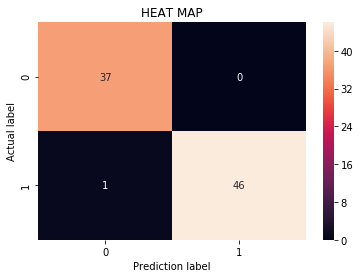

In [57]:
import seaborn as sns                      #importing the seaborn package as sns
import matplotlib.pyplot as plt            #importing the matplotlib package as plt
sns.heatmap(pd.DataFrame(cm),annot = True) #to get the heatmap,we get heatmap derived class from sns class
plt.title("HEAT MAP")                      #getting the title of the heat map
plt.xlabel("Prediction label")             #getting the x label of heat map
plt.ylabel("Actual label")                 #getting the y label of heat map

# *DECISION TREE*

In [59]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [62]:
dot_data = StringIO()
tree.export_graphviz(clf,out_file = dot_data)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('sentiment_tree.png')
Image = (graph.create_png())

In [63]:
inp_comment = input("Enter a Comment: ")

#translates any language to english
from googletrans import Translator
text = inp_comment

destination_languages = {
    'english': 'en'
}
translator = Translator()

for key,value in destination_languages.items():
    print(translator.translate(text, dest = value).text)
    op = translator.translate(text, dest = value).text
Movie_reviews_array = np.array([op])
Movie_review_vector = Vectorizer.transform(Movie_reviews_array)
prediction = clf.predict(Movie_review_vector)
print(prediction)

if(prediction == 1):
    print("POSETIVE comment...")
else:
    print("NEGETIVE comment...")

Enter a Comment: yp
yp
[0]
NEGETIVE comment...


In [64]:
pred_for_acuracy = clf.predict(X_test)                                #prediction of x_test to get accuracy
print("Accuracy: ",metrics.accuracy_score(Y_test, pred_for_acuracy))  #printing the model accuracy

Accuracy:  0.9642857142857143


In [65]:
from sklearn import metrics                             #importing metrics from sklearn
cm = metrics.confusion_matrix(Y_test, pred_for_acuracy) #we get confusion matrix as a derived class from the metrics class
print(cm)

[[37  0]
 [ 3 44]]


Text(33.0, 0.5, 'Actual label')

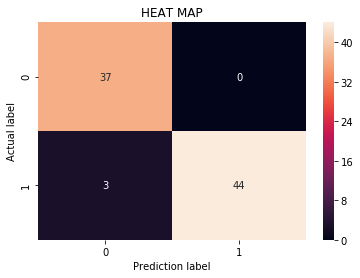

In [66]:
import seaborn as sns                      #importing the seaborn package as sns
import matplotlib.pyplot as plt            #importing the matplotlib package as plt
sns.heatmap(pd.DataFrame(cm),annot = True) #to get the heatmap,we get heatmap derived class from sns class
plt.title("HEAT MAP")                      #getting the title of the heat map
plt.xlabel("Prediction label")             #getting the x label of heat map
plt.ylabel("Actual label")                 #getting the y label of heat map

# *LOGISTIC REGRESSION*

In [68]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,Y_train)

C:\ProgramData\sou\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
inp_comment = input("Enter a Comment: ")

# language Translator

from googletrans import Translator
text = inp_comment

destination_languages = {
    'english': 'en'
}
translator = Translator()

for key,value in destination_languages.items():
    print(translator.translate(text, dest = value).text)
    op = translator.translate(text, dest = value).text


Enter a Comment: f
f


In [75]:
#Prediction of the sentiment of the comment

Movie_reviews_array = np.array([op])                               #converting the i/p string into array
Movie_review_vector = Vectorizer.transform(Movie_reviews_array)    #vectorising the array
prediction = clf.predict(Movie_review_vector)                      #prediction
print(prediction)

if(prediction == 1):
    print("POSETIVE comment...")
else:
    print("NEGETIVE comment...")

[0]
NEGETIVE comment...


In [76]:
pred_for_acuracy = clf.predict(X_test)                                #prediction of x_test to get accuracy
print("Accuracy: ",metrics.accuracy_score(Y_test, pred_for_acuracy))  #printing the model accuracy

Accuracy:  0.9642857142857143


In [77]:
from sklearn import metrics                             #importing metrics from sklearn
cm = metrics.confusion_matrix(Y_test, pred_for_acuracy) #we get confusion matrix as a derived class from the metrics class
print(cm)

[[37  0]
 [ 3 44]]


Text(33.0, 0.5, 'Actual label')

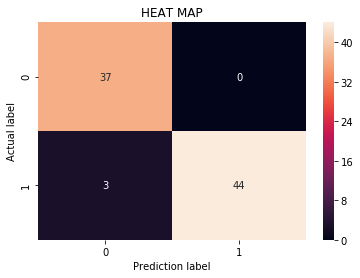

In [78]:
import seaborn as sns                      #importing the seaborn package as sns
import matplotlib.pyplot as plt            #importing the matplotlib package as plt
sns.heatmap(pd.DataFrame(cm),annot = True) #to get the heatmap,we get heatmap derived class from sns class
plt.title("HEAT MAP")                      #getting the title of the heat map
plt.xlabel("Prediction label")             #getting the x label of heat map
plt.ylabel("Actual label")                 #getting the y label of heat map